# Linear Regression
Linear regression is one of the supervised Machine learning algorithms in Python that observes continuous features and predicts an outcome. Depending on whether it runs on a single variable or on many features, we can call it simple linear regression or multiple linear regression.

This is one of the most popular Python ML algorithms and often under-appreciated. It assigns optimal weights to variables to create a line ax+b to predict the output. We often use linear regression to estimate real values like a number of calls and costs of houses based on continuous variables. The regression line is the best line that fits Y=a*X+b to denote a relationship between independent and dependent variables.

Let’s plot this for the diabetes dataset.

https://data-flair.training/blogs/machine-learning-algorithms-in-python/

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
import os
import warnings        # Allows the code to ignore uneccessary warnings
warnings.filterwarnings('ignore')
#os.chdir("../Datasets/")

diabetes=datasets.load_diabetes()
print(diabetes.DESCR)
diabetes.data


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

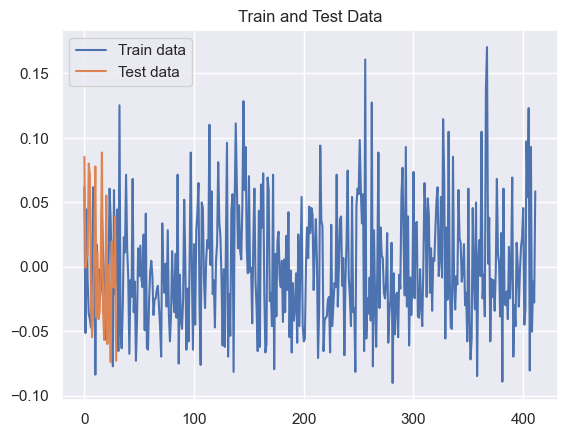

In [3]:
# print(diabetes.data.shape)
diabetes_X=diabetes.data[:,np.newaxis,2] # bio-mass index

diabetes_X_train=diabetes_X[:-30] #splitting data into training and test sets
diabetes_X_test=diabetes_X[-30:]

diabetes_y_train=diabetes.target[:-30] #splitting targets into training and test sets
diabetes_y_test=diabetes.target[-30:]

plt.plot(diabetes_X_train, label="Train data")
plt.plot(diabetes_X_test, label="Test data")
plt.title('Train and Test Data')
plt.legend()
plt.show()

In [4]:
regr=linear_model.LinearRegression() #Linear regression object
regr.fit(diabetes_X_train,diabetes_y_train) #Use training sets to train the model
print("Score=", regr.score(diabetes_X_train,diabetes_y_train))
print("Model slope:    ", regr.coef_[0])
print("Model intercept:", regr.intercept_)

Score= 0.3363413619129114
Model slope:     941.4309733293181
Model intercept: 153.39713623331644


In [5]:
diabetes_y_pred=regr.predict(diabetes_X_test) #Make predictions
#regr.coef_
mean_squared_error(diabetes_y_test,diabetes_y_pred)

3035.060115291269

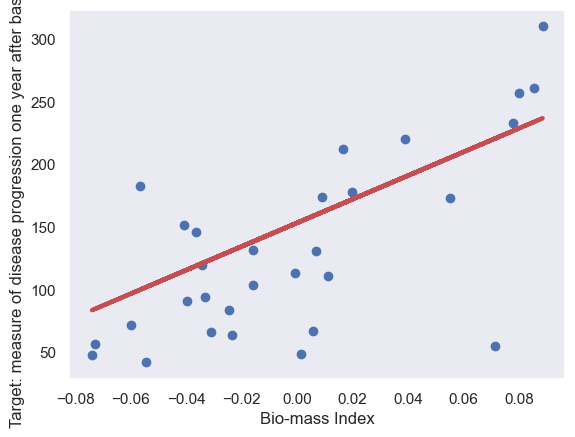

In [6]:
plt.plot(diabetes_X_test,diabetes_y_pred,color='r',linewidth=3)
plt.scatter(diabetes_X_test,diabetes_y_test,color ='b')
#plt.xticks(())
#plt.yticks(())
#plt.grid
plt.xlabel('Bio-mass Index')
plt.ylabel('Target: measure of disease progression one year after baseline')
plt.grid()
plt.show()


# MORE ON LINEAR REGRESSION
# In Depth: Linear Regression
https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html


## Linear regression models are a good starting point for regression tasks. Such models are popular because they can be fit very quickly, and are very interpretable. You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form

$$y=ax+b$$

where $a$ is commonly known as the slope, and $b$ is commonly known as the intercept.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

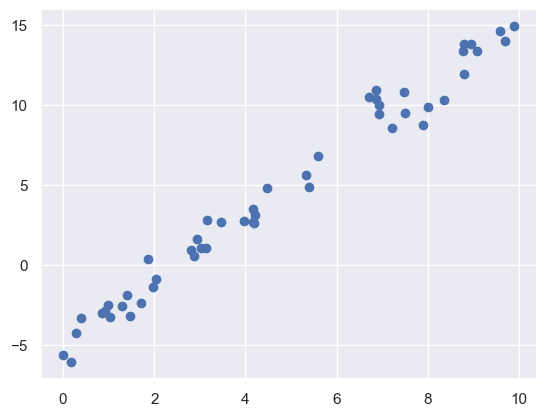

In [8]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:

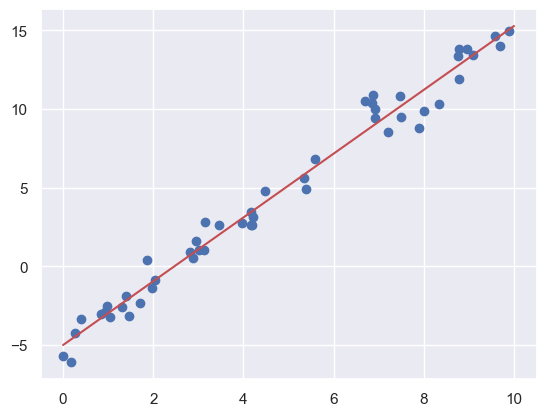

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="r");

# model.fit(x[:, np.newaxis], y)

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

In [10]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606944
Model intercept: -4.9985770855532


We see that the results are very close to the inputs, as we might hope.

The LinearRegression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$y=a_0+a_1x_1+a_2x_2+⋯ $$
where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [11]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + 0.1*rng.randn(100)

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5156233346576857
[ 1.49815954 -1.99762243  0.99725804]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single LinearRegression estimator to fit lines, planes, or hyperplanes to our data. It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

# RIDGE REGRESSION AND LASSO
https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/



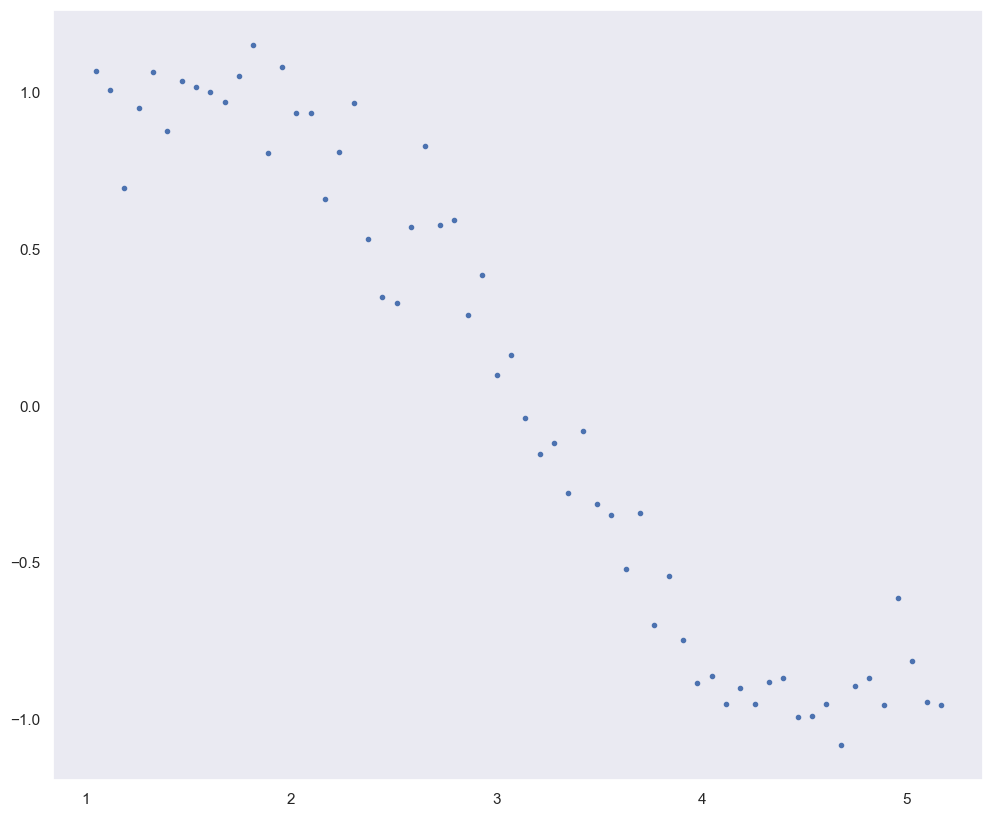

In [12]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.grid()

## Let’s try to estimate the sine function using polynomial regression with powers of x from 1 to 15. Let’s add a column for each power upto 15 in our dataframe. This can be accomplished using the following code:

In [13]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

## Now that we have all the 15 powers, let’s make 15 different linear regression models with each model containing variables with powers of x from 1 to the particular model number. For example, the feature set of model 8 will be – {x, x_2, x_3, … ,x_8}.

First, we’ll define a generic function which takes in the required maximum power of x as an input and returns a list containing – [ model RSS, intercept, coef_x, coef_x2, … upto entered power ]. Here RSS refers to ‘Residual Sum of Squares’ which is nothing but the sum of square of errors between the predicted and actual values in the training data set. The python code defining the function is:

In [14]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression()
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    # LinearRegression()

    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

## Note that this function will not plot the model fit for all the powers but will return the RSS and coefficients for all the models. I’ll skip the details of the code for now to maintain brevity. I’ll be happy to discuss the same through comments below if required.

Now, we can make all 15 models and compare the results. For ease of analysis, we’ll store all the results in a Pandas dataframe and plot 6 models to get an idea of the trend. Consider the following code:

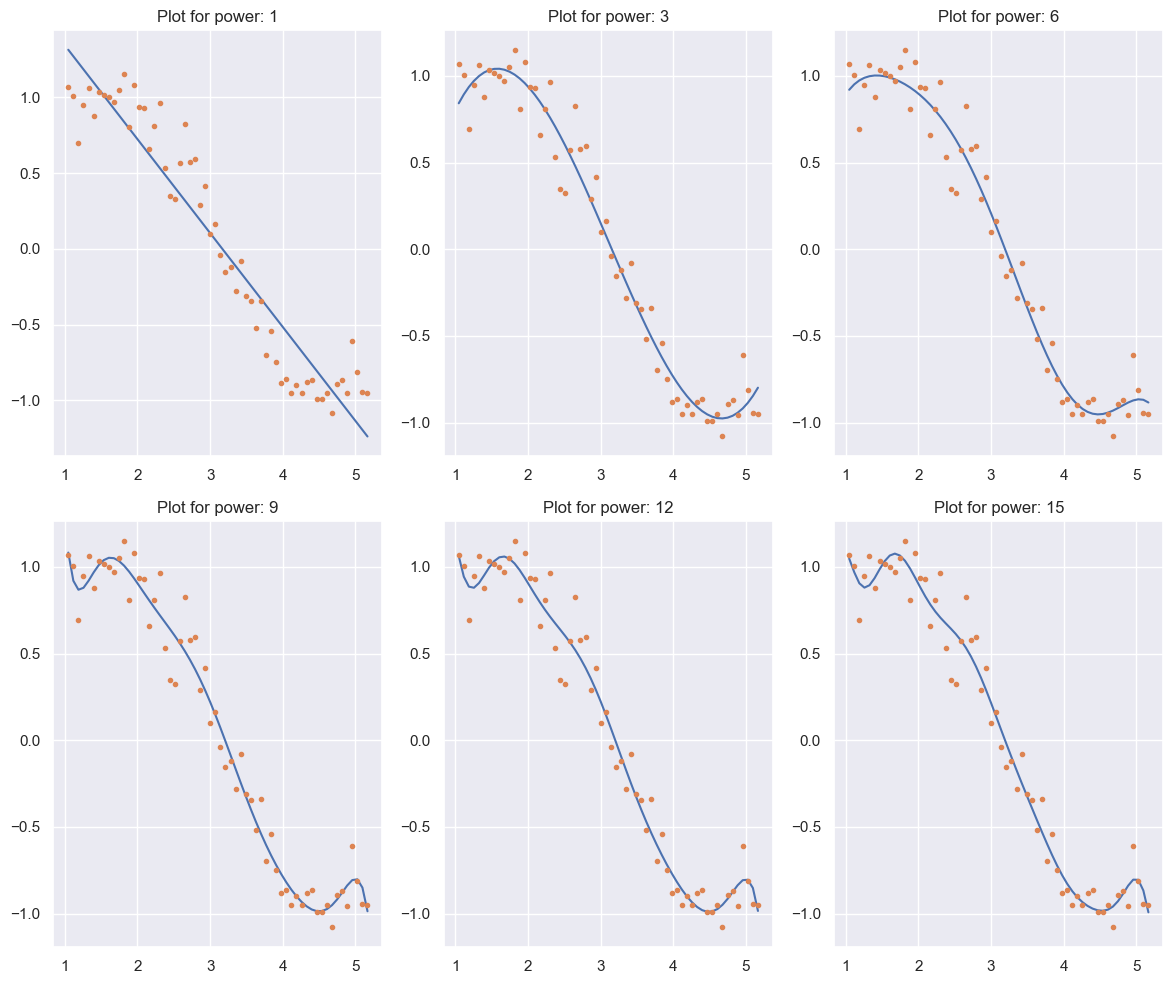

In [15]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)
 

## This clearly aligns with our initial understanding. As the model complexity increases, the models tends to fit even smaller deviations in the training data set. Though this leads to overfitting, lets keep this issue aside for some time and come to our main objective, i.e. the impact on the magnitude of coefficients. This can be analysed by looking at the data frame created above.

In [16]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


## It is clearly evident that the size of coefficients increase exponentially with increase in model complexity. I hope this gives some intuition into why putting a constraint on the magnitude of coefficients can be a good idea to reduce model complexity.

Lets try to understand this even better.


What does a large coefficient signify? It means that we’re putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modelling intricate relations to estimate the output and ends up overfitting to the particular training data.

I hope the concept is clear. I’ll be happy to discuss further in comments if needed. Now, lets understand ridge and lasso regression in detail and see how well they work for the same problem.

 

## Ridge Regression
As mentioned before, ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

$\min_{\beta} \left\{ (y-X\beta)^T(y-X\beta) + \alpha (\beta ^T \beta)\right\} $

Objective = RSS + α * (sum of square of coefficients).

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

α = 0:
The objective becomes same as simple linear regression.
We’ll get the same coefficients as simple linear regression.
α = ∞:
The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
0 < α < ∞:
The magnitude of α will decide the weightage given to different parts of objective.
The coefficients will be somewhere between 0 and ones for simple linear regression.
I hope this gives some sense on how α would impact the magnitude of coefficients. One thing is for sure that any non-zero value would give values less than that of simple linear regression. By how much? We’ll find out soon. Leaving the mathematical details for later, lets see ridge regression in action on the same problem as above.

First, lets define a generic function for ridge regression similar to the one defined for simple linear regression.

In [17]:
from sklearn.linear_model import Ridge

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

## Note the ‘Ridge’ function used here. It takes ‘alpha’ as a parameter on initialization. Also, keep in mind that normalizing the inputs is generally a good idea in every type of regression and should be used in case of ridge regression as well.

Now, lets analyze the result of Ridge regression for 10 different values of α ranging from 1e-8 to 50. These values have been chosen so that we can easily analyze the trend with change in values of α. These would however differ from case to case.

Note that each of these 10 models will contain all the 15 variables and only the value of alpha would differ. This is different from the simple linear regression case where each model had a subset of features.

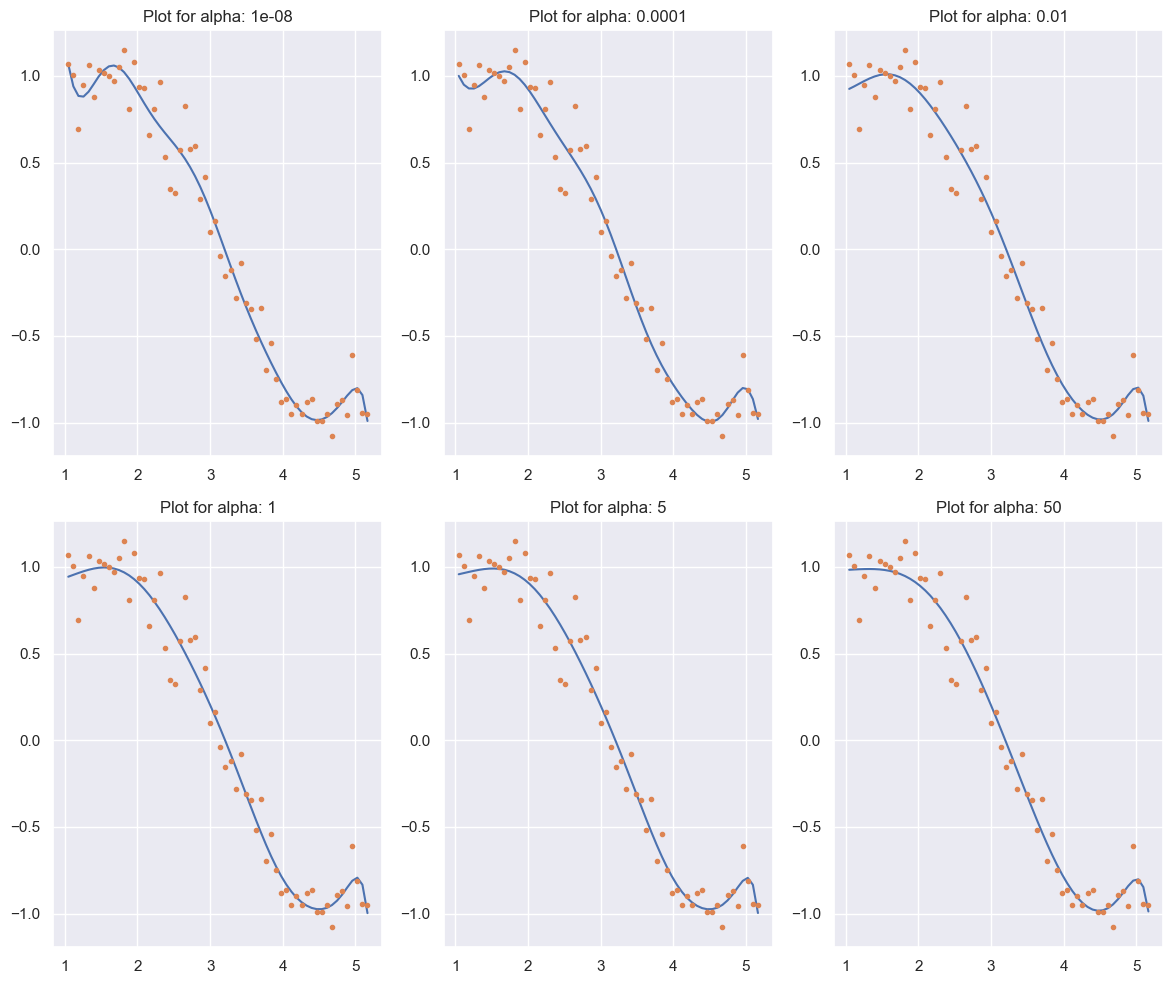

In [18]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
# alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
alpha_ridge = [1e-8, 1e-6, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 50]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-8:231, 1e-4:232, 1e-2:233, 1:234, 5:235, 50:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

## Here we can clearly observe that as the value of alpha increases, the model complexity reduces. Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well (eg. alpha = 50). Thus alpha should be chosen wisely. A widely accept technique is cross-validation, i.e. the value of alpha is iterated over a range of values and the one giving higher cross-validation score is chosen.

Lets have a look at the value of coefficients in the above models:

In [19]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-08,0.87,-5.8,65,-1.1e+02,-9.5,1.3e+02,-49,-1.2e+02,1.8e+02,-1.2e+02,49,-13,2.5,-0.32,0.026,-0.0013,2.6e-05
alpha_1e-06,0.87,18,-22,-8,12,12,-6.5,-11,6.8,5,-7.4,3.9,-1.2,0.23,-0.026,0.0018,-5.1e-05
alpha_0.0001,0.89,6.3,-5.9,-3.3,2.2,4,0.019,-3.6,-0.14,3.4,-2.8,1.1,-0.28,0.044,-0.0042,0.00022,-5e-06
alpha_0.001,0.91,3.4,-1.8,-1.9,-0.5,1.5,2,-0.48,-3.8,4.1,-1.9,0.39,-0.0083,-0.015,0.0034,-0.00033,1.2e-05
alpha_0.01,0.93,1.1,-0.27,-0.18,0.11,0.3,0.13,-0.26,-0.22,0.4,-0.22,0.055,-0.0046,-0.0009,0.00028,-2.8e-05,1e-06
alpha_1,0.94,0.87,0.0072,0.018,0.027,0.027,0.012,-0.01,-0.02,-0.0024,0.017,-0.0082,0.00095,0.00034,-0.00013,1.6e-05,-7.3e-07
alpha_5,0.95,0.92,0.0036,0.0083,0.013,0.014,0.0095,-2.1e-05,-0.0087,-0.0072,0.0041,0.0051,-0.0049,0.0018,-0.00033,3.2e-05,-1.3e-06
alpha_10,0.95,0.93,0.0026,0.0061,0.0093,0.011,0.0078,0.00065,-0.0067,-0.0065,0.003,0.0047,-0.0042,0.0015,-0.00028,2.7e-05,-1e-06
alpha_20,0.95,0.95,0.0017,0.0041,0.0064,0.0075,0.006,0.0013,-0.0044,-0.0056,0.00087,0.0054,-0.0041,0.0014,-0.00025,2.4e-05,-9.1e-07
alpha_50,0.96,0.97,0.00095,0.0022,0.0035,0.0042,0.0034,0.00081,-0.0026,-0.0036,0.00026,0.0036,-0.0026,0.00086,-0.00015,1.4e-05,-5.5e-07


## This straight away gives us the following inferences:

1. The RSS increases with increase in alpha, this model complexity reduces. 
2. An alpha as small as 1e-8 gives us significant reduction in magnitude of coefficients. How? Compare the coefficients in the first row of this table to the last row of simple linear regression table.
3. High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1.
4. Though the coefficients are very very small, they are NOT zero.

The first 3 are very intuitive. But #4 is also a crucial observation. Let’s reconfirm the same by determining the number of zeros in each row of the coefficients data set:

In [20]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-08     0
alpha_1e-06     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
alpha_50        0
dtype: int32

## This confirms that all the 15 coefficients are greater than zero in magnitude (can be +ve or -ve). Remember this observation and have a look again until its clear. This will play an important role in later while comparing ridge with lasso regression.

## Lasso Regression
LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.

Lets consider the former first and worry about the latter later.

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

$\min_{\beta} \left\{ (y-X\beta)^T(y-X\beta) + \alpha ||\beta||_1\right\} $

Objective = RSS + α * (sum of absolute value of coefficients)
Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

α = 0: Same coefficients as simple linear regression
α = ∞: All coefficients zero (same logic as before)
0 < α < ∞: coefficients between 0 and that of simple linear regression
Yes its appearing to be very similar to Ridge till now. But just hang on with me and you’ll know the difference by the time we finish. Like before, lets run lasso regression on the same problem as above. First we’ll define a generic function:

In [21]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha, max_iter=100000)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret


Lets check the output for 10 different values of alpha using the following code:

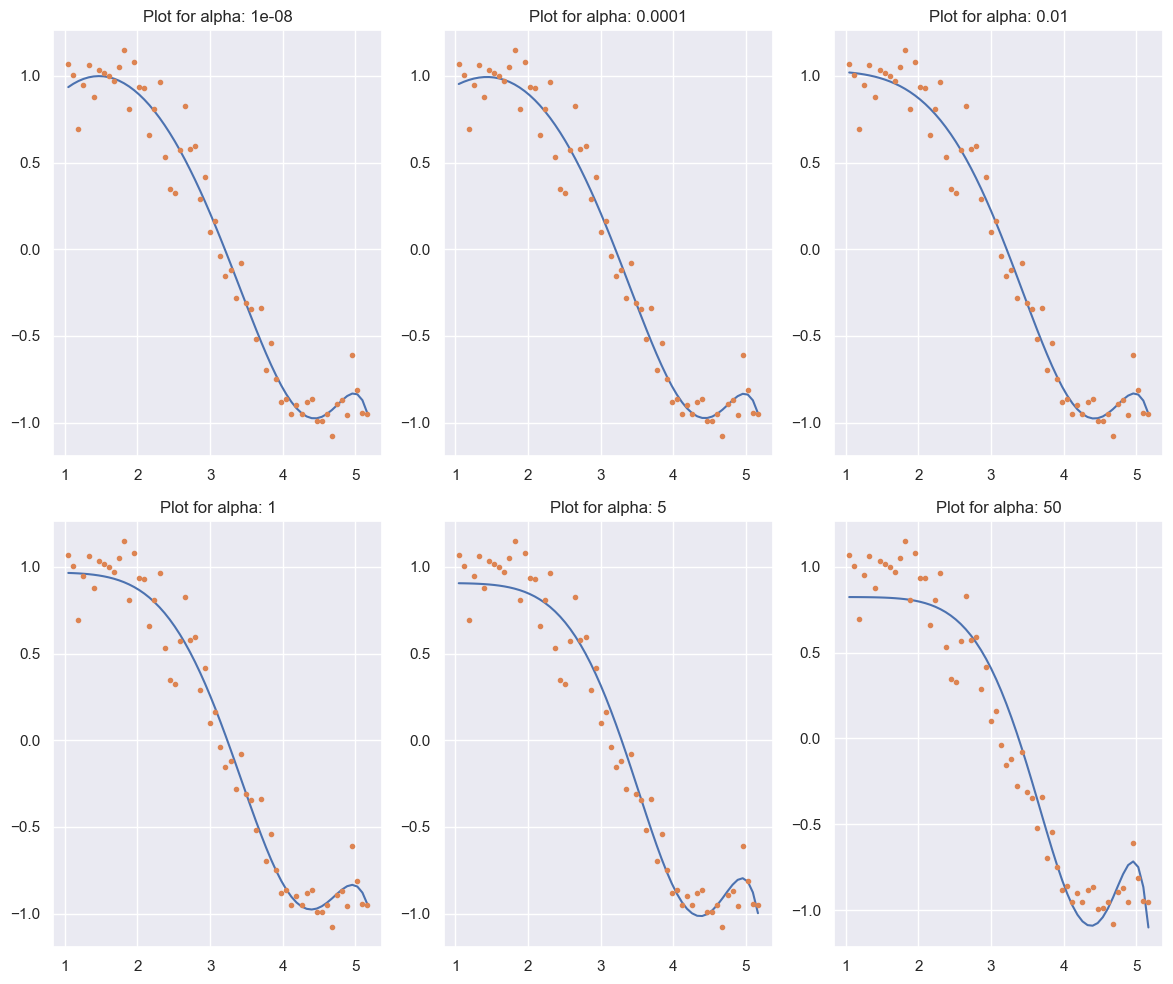

In [22]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-8, 1e-6, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 50]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-8:231, 1e-4:232, 1e-2:233, 1:234, 5:235, 50:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

# This again tells us that the model complexity decreases with increase in the values of alpha. Let’s explore further by looking at the coefficients:



In [23]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso


,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-08,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-06,0.96,0.23,1.1,-0.37,0.00022,0.0016,-0.00011,-6.4e-05,-6.2e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_0.0001,0.96,0.55,0.5,-0.046,-0.065,0.0022,0.00048,1e-05,-2.1e-06,9.5e-07,5.8e-07,1.7e-07,3.4e-08,4.8e-09,1.9e-10,-1.7e-10,-8.5e-11
alpha_0.001,0.97,0.95,0,0.07,-0.011,-0.019,0.00081,0.00028,2.8e-05,2.5e-06,3.1e-07,6.8e-08,1.5e-08,2.1e-09,7.1e-12,-1.3e-10,-6.3e-11
alpha_0.01,0.99,1,0,0,0,-0.0042,-0.0038,0.00026,8.5e-05,8.7e-06,6.7e-07,2.5e-08,-4e-09,-1.5e-09,-4.3e-10,-1.3e-10,-4.2e-11
alpha_1,1,0.97,-0,-0,-0,-0,-0,-0.002,4.5e-05,9.8e-05,3.3e-06,-5.2e-07,-1.6e-07,-2.6e-08,-2.7e-09,3.8e-11,1.1e-10
alpha_5,1.2,0.91,-0,-0,-0,-0,-0,-0.00016,-0.00061,7.3e-05,2.2e-05,3.6e-07,-2.1e-07,-5e-08,-6.6e-09,-2.6e-10,1.8e-10
alpha_10,1.3,0.89,-0,-0,-0,-0,-0,-0,-0.00053,-0,3.2e-05,1e-06,-2.2e-07,-6.3e-08,-8.8e-09,-3.9e-10,2.4e-10
alpha_20,1.5,0.87,-0,-0,-0,-0,-0,-0,-0.00035,-4.4e-05,2.1e-05,3.2e-06,-6.8e-08,-5.9e-08,-1e-08,-7.6e-10,1.8e-10
alpha_50,2,0.82,-0,-0,-0,-0,-0,-0,-0,-0.00013,2.7e-06,7.4e-06,1.8e-07,-5.4e-08,-1.3e-08,-1.5e-09,9.9e-11


## Apart from the expected inference of higher RSS for higher alphas, we can see the following:

1. For the same values of alpha, the coefficients of lasso regression are much smaller as compared to that of ridge regression (compare row 1 of the 2 tables).
2. For the same alpha, lasso has higher RSS (poorer fit) as compared to ridge regression
3. Many of the coefficients are zero even for very small values of alpha

Inferences #1,2 might not generalize always but will hold for many cases. The real difference from ridge is coming out in the last inference. Lets check the number of coefficients which are zero in each model using following code:

In [24]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-08     0
alpha_1e-06     0
alpha_0.0001    0
alpha_0.001     1
alpha_0.01      3
alpha_1         5
alpha_5         5
alpha_10        7
alpha_20        6
alpha_50        7
dtype: int32


## Outliers in the data: Experiments with L2 and L1 (Huber) norms


linear regression, coeff, intercept  [0.70166948] 3.00491365978612
Huber regression, coeff, intercept = [0.8690973] 2.292314728909921


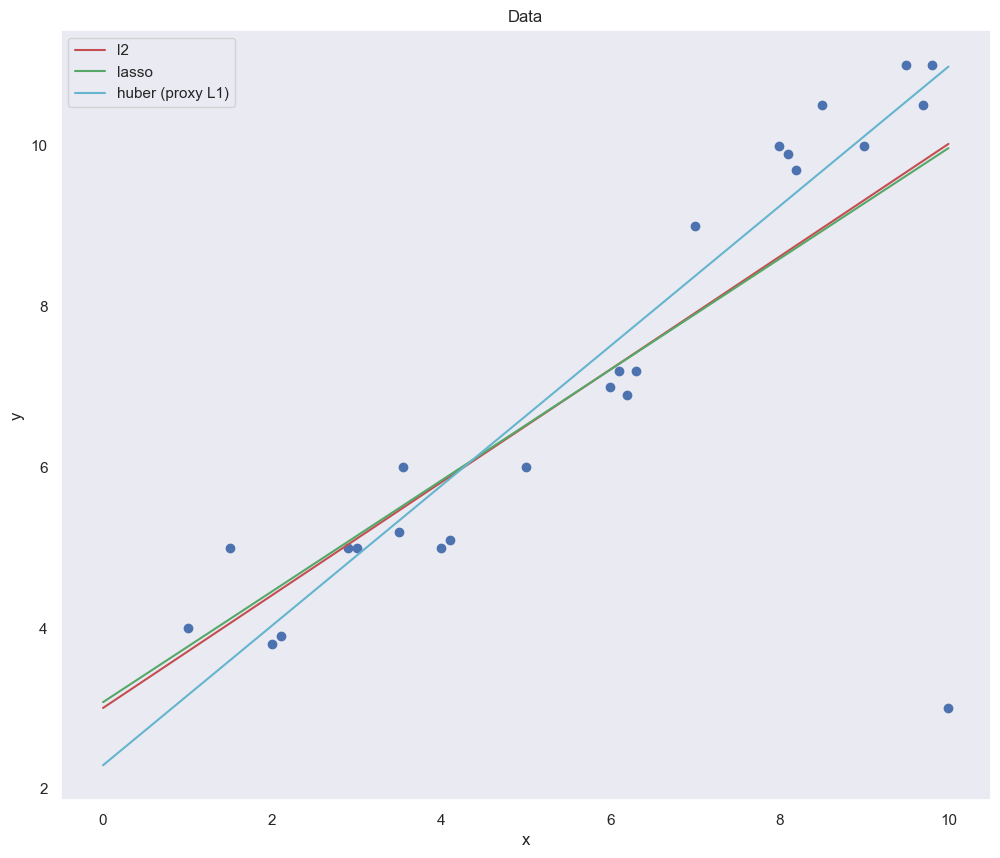

In [25]:
from sklearn.linear_model import LinearRegression
x, y =np.loadtxt('xydata.dat',unpack=True)
"""
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.grid()
plt.show()
"""
# First USE a standrd L2 Norm


model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
print("linear regression, coeff, intercept ",model.coef_,model.intercept_)

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r',label="l2")



from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.1, max_iter=100000)
lassoreg.fit(x[:, np.newaxis], y)
y_pred_lass = lassoreg.predict(xfit[:, np.newaxis])

plt.plot(xfit, y_pred_lass, 'g',label="lasso")



from sklearn.linear_model import HuberRegressor
hubreg = HuberRegressor()
hubreg.fit(x[:, np.newaxis], y)
y_pred_hub = hubreg.predict(xfit[:, np.newaxis])
print('Huber regression, coeff, intercept =',hubreg.coef_,hubreg.intercept_)
plt.plot(xfit, y_pred_hub, 'c',label="huber (proxy L1)")

plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.grid()
plt.show()

## Now Bayesian Regresson on this dataset
https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html


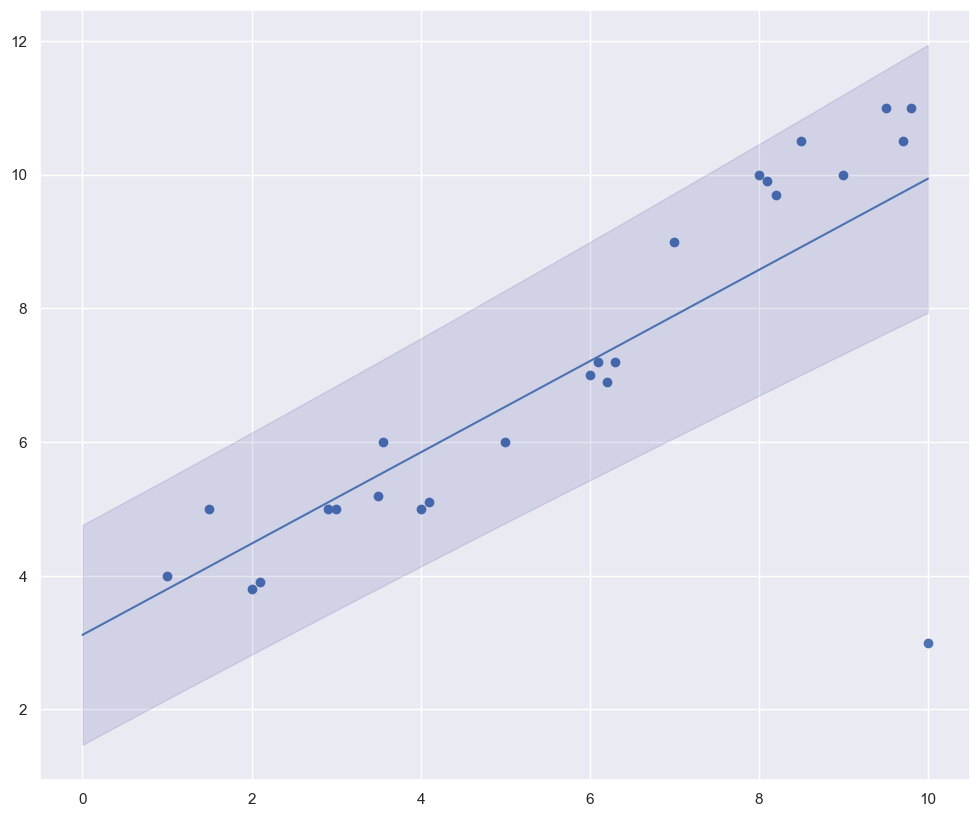

fit parameters: [0.68249352] 3.1161726095769224
0.36980629212413063
[[0.01308746]]
[-53.39129438 -49.70807208 -49.7080673  -49.70806392]


In [26]:
# import required libraries
from scipy import stats
from sklearn.linear_model import BayesianRidge

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(x[:, np.newaxis], y)
y_bayes,y_std = clf.predict( xfit[:, np.newaxis], return_std=True)
plt.scatter(x,y)
plt.plot(xfit,y_bayes)
plt.fill_between(
    xfit.ravel(),
    y_bayes - y_std,
    y_bayes + y_std,
    color="navy",
    alpha=0.1,
)
plt.show()

print('fit parameters:',clf.coef_,clf.intercept_)
#print(clf.get_params)
print(clf.alpha_) # noise estimate
print(clf.sigma_)  # variance of paramter
print(clf.scores_)

# #############################################################################